# Artificial Neural Networks

Artificial Neural Networks (ANNs)

#### Perceptron Model

All Neurons of previous layer are fully connected to all neurons of the next layer => **Dense Layer**

In [10]:
# Single Perceptron Example

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [14]:
iris = load_iris()
X = iris.data[:, (2, 3)] # Petal Length, Width
y = (iris.target == 0).astype(np.int) # Iris Setosa

In [15]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [16]:
y_pred = per_clf.predict([[2, 0.5]])

In [17]:
y_pred

array([0])

#### Multi Layer Perceptron Model (MLP)/ Deep Neural Network (DNN)

**Activation Functions**
* Step Function (Linear hence Gradient Descent cannot work)
* Sigmoid (sigma(z) = 1/(1+exp(-z))
* Hyperbolic Tangent (tanh(z) = 2sigma(2z) -1)
* ReLU (Rectified Linear Unit Function) (ReLU(z) = max(0, z))
* Soft Plus (softplus(z) = log(1_exp(z)))

**Loss Functions**

*Regression*
* Mean Squared Error
* Mean Absolute Error (If dataset has many outliers)
* Huber Loss (Combination of Mean Squared and Absolute)

*Classification*
* Cross-Entropy Loss (Log Loss)

In [2]:
import tensorflow as tf
from tensorflow import keras

### Image Classifier using Sequential API

**Fashion MNIST**

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

#### Spliting the Dataset to Training & Validation mapping pixel values to 0-1 range

In [8]:
X_valid, X_train = X_train_full[:5000]/250.0, X_train_full[5000:]/250.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

#### Creating Model

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))  # reshapes data to 1D layer
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 Output Classes, Softmax because classes are exclusive

**or**

model = keras.models.Sequential([

    keras.layers.Flatten(input_shape=[28, 28]),
    
    keras.layers.Dense(300, activation='relu'),
    
    keras.layers.Dense(100, activation='relu'),
    
    keras.layers.Dense(10, activation='softmax')
    
])

In [14]:
model.summary()  # Get Model Summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers  # Get Layers as Objects

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:
model.get_layer('dense_3') is hidden1

True

**Access Parameters of Model**

In [18]:
weights, baises = hidden1.get_weights()

In [19]:
weights

array([[ 0.00512695,  0.01921242,  0.03789552, ...,  0.02957894,
         0.01183084,  0.06524068],
       [ 0.00702969,  0.04574708,  0.04260324, ...,  0.06414644,
         0.07084455, -0.06259472],
       [ 0.067012  , -0.02496573, -0.01180158, ...,  0.07188828,
        -0.07353683,  0.05737053],
       ...,
       [ 0.01838095,  0.05082804,  0.06326634, ...,  0.05495444,
        -0.05183962, -0.04725914],
       [ 0.03009085, -0.07114021, -0.03000849, ...,  0.05728084,
         0.01274969, -0.0670065 ],
       [ 0.0387482 , -0.07418387, -0.05091747, ...,  0.05750048,
         0.01864098,  0.04134686]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [22]:
baises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
baises.shape

(300,)

#### Compiling Model

In [24]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='sgd',  # Stochastic Gradient Descent (default learning rate = 0.01)
             metrics=['accuracy'])

**Choices for Loss Functions**
* Sparse Categorical Crossentropy: For Sparse Labels and exclusive classes
* Categorical Crossentrpy: One Target Probability per Class (One-Hot Vectors)
* Binary Crossentropy: Binary Classification

#### Training and Evaluation

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9980 - accuracy: 0.6870 - val_loss: 0.5208 - val_accuracy: 0.8144
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5049 - accuracy: 0.8246 - val_loss: 0.4806 - val_accuracy: 0.8336
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4496 - accuracy: 0.8445 - val_loss: 0.4353 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4180 - accuracy: 0.8527 - val_loss: 0.4127 - val_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3968 - accuracy: 0.8599 - val_loss: 0.3932 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3846 - accuracy: 0.8640 - val_loss: 0.3943 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3691 - accuracy: 0.8690 - val_loss: 0.3641 - val_accuracy:

**Note:**
* *Validation ratio can also be given by `validation_split=0.1` instead of manually spliting and giving it.*
* *Custom `class_weight` can also be given if the dataset is skewed.*
* *Instance weights can also be given if some part of dataset is expected to be more accurate than other.*

#### Visualizing Results

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

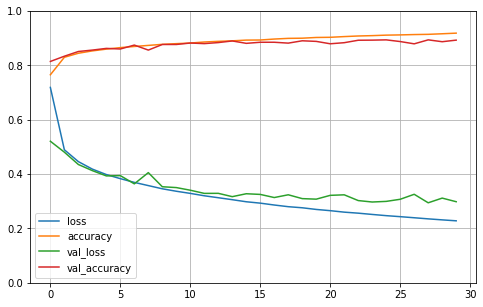

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Set vertical limit from 0 to 1
plt.show()

#### Evaluation

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 77.1906 - accuracy: 0.8275


[77.19056701660156, 0.8274999856948853]

#### Prediction

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [37]:
import numpy as np

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

### Regression MLP using Sequential API

**California Housing**

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
housing = fetch_california_housing()

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [49]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0566 - val_loss: 0.6918
Epoch 2/20
363/363 [==============================] - 0s 834us/step - loss: 0.6374 - val_loss: 0.5940
Epoch 3/20
363/363 [==============================] - 0s 800us/step - loss: 0.6564 - val_loss: 0.4904
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5147 - val_loss: 0.4650
Epoch 5/20
363/363 [==============================] - 0s 1000us/step - loss: 0.4995 - val_loss: 0.4222
Epoch 6/20
363/363 [==============================] - 0s 793us/step - loss: 0.4170 - val_loss: 0.4072
Epoch 7/20
363/363 [==============================] - 0s 820us/step - loss: 0.3961 - val_loss: 0.4070
Epoch 8/20
363/363 [==============================] - 0s 773us/step - loss: 0.3914 - val_loss: 0.3953
Epoch 9/20
363/363 [==============================] - 0s 818us/step - loss: 0.4035 - val_loss: 0.3931
Epoch 10/20
363/363 [==============================] - 0s 788us/step - loss: 0.3907 -

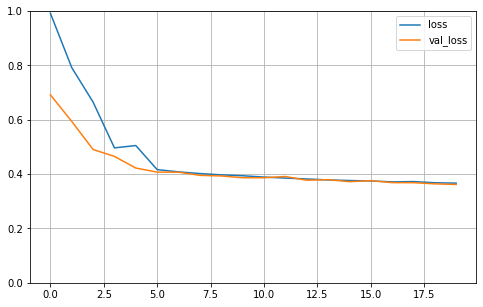

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Set vertical limit from 0 to 1
plt.show()

In [51]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3569


### Complex Model using Functional API

Input Layer is connected to Dense Layer inside the model as well as to the Output Layer. This allows the model to both learn deep patterns (like sequential models) and simple rules.

*Functional API because it is called like a function.*

**Input Layer Conneceted to Dense Model (Deep Path) as well as Output (Wide Path)**

In [8]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])  # Concatenates the results from the deep layers are well as directly from input layer
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

**Inputs are devided, few features are sent throuth Deep Path others are sent through Wide Path**

In [13]:
inputA = keras.layers.Input(shape=[5], name='wide_input')  # Takes 5 Features
inputB = keras.layers.Input(shape=[6], name='deep_input')  # Takes 6 Features
hidden1 = keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([inputA, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.Model(inputs=[inputA, inputB], outputs=[output])

In [15]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [16]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

*Input Data is added as a Tuple*

In [17]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.1129 - val_loss: 0.8878
Epoch 2/20
363/363 [==============================] - 0s 908us/step - loss: 0.8376 - val_loss: 0.7117
Epoch 3/20
363/363 [==============================] - 0s 896us/step - loss: 0.7088 - val_loss: 0.6580
Epoch 4/20
363/363 [==============================] - 0s 874us/step - loss: 0.6632 - val_loss: 0.6274
Epoch 5/20
363/363 [==============================] - 0s 888us/step - loss: 0.6107 - val_loss: 0.6044
Epoch 6/20
363/363 [==============================] - 0s 897us/step - loss: 0.5845 - val_loss: 0.5848
Epoch 7/20
363/363 [==============================] - 0s 938us/step - loss: 0.5720 - val_loss: 0.5673
Epoch 8/20
363/363 [==============================] - 0s 852us/step - loss: 0.5656 - val_loss: 0.5532
Epoch 9/20
363/363 [==============================] - 0s 893us/step - loss: 0.5505 - val_loss: 0.5414
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5430 - 

In [19]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 869us/step - loss: 0.4432


In [20]:
y_pred = model.predict((X_new_A, X_new_B))

In [21]:
y_pred

array([[2.0852504],
       [2.0251963],
       [3.3877177]], dtype=float32)

**Multiple Outputs**

In [37]:
inputA = keras.layers.Input(shape=[5], name='wide_input')  # Takes 5 Features
inputB = keras.layers.Input(shape=[6], name='deep_input')  # Takes 6 Features
hidden1 = keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([inputA, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.Model(inputs=[inputA, inputB], outputs=[output, aux_output])

* *Each Output Layer can have individual Loss Function.*
* *By Default, final loss would be the sum of losses ot all output layers. But, in some cases, one output might be of more importance, hence weights of outputs can be given.*

In [38]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

*Output Labels are added in tuples.*

In [36]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5309 - main_output_loss: 1.3654 - aux_output_loss: 3.0208 - val_loss: 0.8613 - val_main_output_loss: 0.8081 - val_aux_output_loss: 1.3401
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6542 - main_output_loss: 0.5901 - aux_output_loss: 1.2315 - val_loss: 0.5741 - val_main_output_loss: 0.5244 - val_aux_output_loss: 1.0214
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5351 - main_output_loss: 0.4854 - aux_output_loss: 0.9825 - val_loss: 0.5072 - val_main_output_loss: 0.4692 - val_aux_output_loss: 0.8498
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4845 - main_output_loss: 0.4464 - aux_output_loss: 0.8279 - val_loss: 0.5001 - val_main_output_loss: 0.4723 - val_aux_output_loss: 0.7500
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4508 - main_output_loss: 0.4207 - aux_output_loss: 0.7220 - val_loss

In [29]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.3452 - main_output_loss: 0.3294 - aux_output_loss: 0.4876


In [30]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

### Dynamic Model using Subclass API

*Allows building complex dynamic models, with loops, conditional branching etc.*

In [31]:
class WideandDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        
        # Creating Layers (Not Calling them rn) (creation)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1, name='main_output')
        self.aux_output = keras.layers.Dense(1, name='aux_output')
        
    def call(self, inputs):
        inputA, inputB = inputs  # Extracting Inputs from Input Tuple
        
        # Calling Layers (usage)
        hidden1 = self.hidden1(inputB)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate((inputA, inputB))
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [32]:
model = WideandDeepModel()

*Pro of Subclass API*
* Allows to create complex architecture within the model

*Con of Subclass API*
* Keras has very little information about the model, it cannot save, clone or show proper summary

## Saving and Restoring a Model

*Works with Functional and Sequential API based models, for Subclass API `save_weights()` and `load_weights()` can be used to save the weights*

**Saving**

In [ ]:
model.save('my_keras_mode.h5')

Keras stores model architecture as well as wights and biases in `HDF5` format.

**Loading**

In [ ]:
model = keras.models.load_model('my_keras_model.h5')

## Callbacks

*Keras calls the callback objects at the start and end of each epoch or processing each batch*

#### Model Checkpoint: Save Model after Regular Intervals

In [39]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')

In [40]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 789us/step - loss: 1.4467 - main_output_loss: 1.2291 - aux_output_loss: 3.40490s - loss: 1.6529 - main_output_loss: 1.4044 - aux_output_loss: 3.
Epoch 2/10
363/363 [==============================] - 0s 830us/step - loss: 0.9001 - main_output_loss: 0.8635 - aux_output_loss: 1.2300
Epoch 3/10
363/363 [==============================] - 0s 764us/step - loss: 0.5134 - main_output_loss: 0.4654 - aux_output_loss: 0.9455
Epoch 4/10
363/363 [==============================] - 0s 792us/step - loss: 0.4715 - main_output_loss: 0.4352 - aux_output_loss: 0.7982
Epoch 5/10
363/363 [==============================] - 0s 774us/step - loss: 0.4314 - main_output_loss: 0.4015 - aux_output_loss: 0.7005
Epoch 6/10
363/363 [==============================] - 0s 776us/step - loss: 0.4272 - main_output_loss: 0.4019 - aux_output_loss: 0.6550
Epoch 7/10
363/363 [==============================] - 0s 774us/step - loss: 0.4096 - main_output_loss: 0.3853 - aux_ou

#### Save Best Model: Saves model only when performance on Validation Set is best so far (i.e. protects from overfitting)

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)

In [42]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)), epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3991 - main_output_loss: 0.3789 - aux_output_loss: 0.5811 - val_loss: 0.4129 - val_main_output_loss: 0.3972 - val_aux_output_loss: 0.5536
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4000 - main_output_loss: 0.3803 - aux_output_loss: 0.5772 - val_loss: 0.3915 - val_main_output_loss: 0.3742 - val_aux_output_loss: 0.5469
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3945 - main_output_loss: 0.3747 - aux_output_loss: 0.5733 - val_loss: 0.3867 - val_main_output_loss: 0.3693 - val_aux_output_loss: 0.5436
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3901 - main_output_loss: 0.3703 - aux_output_loss: 0.5686 - val_loss: 0.3897 - val_main_output_loss: 0.3728 - val_aux_output_loss: 0.5417
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3872 - main_output_loss: 0.3675 - aux_output_loss: 0.5645 - val_loss

In [45]:
# Roll Back to Best Model

model = keras.models.load_model('my_keras_model.h5')

#### Early Stopping: Stops Training if no significant change in accuracy of validation set is detected

In [46]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [48]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)), epochs=100, 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3465 - main_output_loss: 0.3311 - aux_output_loss: 0.4855 - val_loss: 0.3401 - val_main_output_loss: 0.3265 - val_aux_output_loss: 0.4630
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3463 - main_output_loss: 0.3314 - aux_output_loss: 0.4807 - val_loss: 0.3475 - val_main_output_loss: 0.3348 - val_aux_output_loss: 0.4622
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3428 - main_output_loss: 0.3281 - aux_output_loss: 0.4748 - val_loss: 0.3651 - val_main_output_loss: 0.3524 - val_aux_output_loss: 0.4794
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3415 - main_output_loss: 0.3271 - aux_output_loss: 0.4711 - val_loss: 0.3415 - val_main_output_loss: 0.3289 - val_aux_output_loss: 0.4547
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3407 - main_output_loss: 0.3267 - aux_output_loss: 0.4666 - val

#### Custom Callbacks

In [51]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

Other Available Methods are `on_train_begin`, `on_train_end`, `on_epoch_begin`, `on_epoch_end`, `on_batch_begin` and `on_batch_end`.

**Note: Callbacks can also be used during Evaluation and Prediction**

Callbacks for evaluation `on_test_begin`, `on_test_end`, `on_test_batch_begin` and `on_test_batch_end`.

Callbacks for prediction `on_predict_begin`, `on_predict_end`, `on_predict_batch_begin` and `on_predict_batch_end`.

## Tensorboard

*Tensorflow writes log flies (event files), while training to a root directory. Tensorboard reades these files from the root directory.*

In [64]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [65]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [66]:
run_logdir = get_run_logdir()

In [58]:
run_logdir

'./my_logs/run_2021_05_03-02_16_00'

**Keras Tensorboard Callback**

In [59]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [60]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)), epochs=30, 
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2971 - main_output_loss: 0.2902 - aux_output_loss: 0.3593 - val_loss: 0.3016 - val_main_output_loss: 0.2950 - val_aux_output_loss: 0.3605
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.2973 - main_output_loss: 0.2903 - aux_output_loss: 0.3603 - val_loss: 0.3030 - val_main_output_loss: 0.2963 - val_aux_output_loss: 0.3628
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.2994 - main_output_loss: 0.2926 - aux_output_loss: 0.3605 - val_loss: 0.3055 - val_main_output_loss: 0.2990 - val_aux_output_loss: 0.3640
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.2964 - main_output_loss: 0.2894 - aux_output_loss: 0.3593 - val_loss: 0.3059 - val_main_output_loss: 0.2995 - val_aux_output_loss: 0.3640
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.2971 - main_output_loss: 0.2901 - aux_output_loss: 0.3597 - val_loss

**Launch Tensorboard from Command Line: `tensorboard --logdir=./my_logs --port=6006`**

**Launch Tensoboard within Jupyter:**

In [62]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

**SummaryWriter**

Custom Data Logger

In [69]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100)+2)* step/100. # Creating Random Data
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)  # Creating Random 32x32 RGB Image
        tf.summary.image('my_images', images*step/1000, step=step)
        texts = ['This Step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(120000) / 48000 * 2 * np.pi *step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

## Hyperparameter Tuninig

### Automated Hyperparameter Tuning

Using scikit learns' `GridSearchCV` or `RandomizedSearchCV`

**Wrapping a Keras Model to become Scikit Learn Compatible**

In [71]:
# Model for Univariate Regression
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [72]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

*Now this model can be used like a normal Scikit Learn Model.*

In [73]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.8138 - val_loss: 1.7483
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3994 - val_loss: 0.6724
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6297 - val_loss: 0.5953
Epoch 4/100
363/363 [==============================] - 0s 984us/step - loss: 0.5783 - val_loss: 0.5493
Epoch 5/100
363/363 [==============================] - 0s 913us/step - loss: 0.5401 - val_loss: 0.5184
Epoch 6/100
363/363 [==============================] - 0s 999us/step - loss: 0.5012 - val_loss: 0.4955
Epoch 7/100
363/363 [==============================] - 0s 859us/step - loss: 0.4778 - val_loss: 0.4797
Epoch 8/100
363/363 [==============================] - 0s 856us/step - loss: 0.4453 - val_loss: 0.4702
Epoch 9/100
363/363 [==============================] - 0s 834us/step - loss: 0.4362 - val_loss: 0.4561
Epoch 10/100
363/363 [==============================] - 0s 870us/step - loss: 0

*Note: Any extra paramaters passed to fit, will be passed to underlying keras model.*

In [75]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 797us/step - loss: 0.3291


**Performing Randomized Search CV**

In [78]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [79]:
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

In [80]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [81]:
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 3.6688 - val_loss: 1.0745
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9571 - val_loss: 0.7755
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7440 - val_loss: 0.7119
Epoch 4/100
242/242 [==============================] - 0s 986us/step - loss: 0.6834 - val_loss: 0.6792
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6561 - val_loss: 0.6569
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6203 - val_loss: 0.6341
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6202 - val_loss: 0.6190
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5992 - val_loss: 0.6028
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5721 - val_loss: 0.5942
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5727 - val_

/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-4.73981231e-01 -2.53647008e+14 -3.81244421e-01 -1.56480448e+09
 -3.42327575e-01 -3.33185891e-01             nan -4.66964444e-01
 -4.18111001e+01             nan]
  warnings.warn(


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7faafb55ca00>, as the constructor either does not set or modifies parameter learning_rate

**Access the Best Parameters**

In [82]:
rnd_search_cv.best_params_

{'learning_rate': 0.0012317163013458553, 'n_hidden': 3, 'n_neurons': 82}

In [83]:
rnd_search_cv.best_score_

-0.33318589131037396

In [ ]:
model = rnd_search_cv.best_estimator_.model

**Zooming: Initially taking very wide range of parameters, then taking parameters close to the best wide range parameter.**

**Resources for Hyperparameter Tuning**

Libraries
* Hyperopt
* Hyperas, Kopt, Talos
* Keras Tuner
* Scikit-Optimize
* Spearmint
* Hyperband
* Sklearn-Deep

Cloud Platforms
* Google Cloub AI Tuning
* Arimo
* SigOpt
* CallDesk's Oscar

### Manual Hyperparameter Tuning

#### Layers

* More Number of Layers are better than single layer with large number of neurons.
* This is because real world data is hierarchical, and deep networks are better able to exploit this than wide networks.
* **Strech Pants Approach:** It is a good practice to try to increase the layers untill the model starts to overfit.

#### Neurons

* The Number of neurons in input layer is determined by the number shape of data.
* The Number of neurons in output layer is determined by the type of task.
* It is common to design deep layers in pyramid structure, though this practice hasn't been found to produce significantly better results than having same number of neurons in all the deep layers.
* **Strech Pants Approach:** It is a good practice to increase the number of neurons until the model starts to overfit (use early stopping/ other regularization techniques to detect).

**Note: In general increasing number of layers will give better results than increasing number of neurons per layer.**

#### Learning Rate

* Most Important Hyperparamter.
* Optimal Learning Rate = Half of Maximum Learning Rate (Learning Rate at which Model Diverges)
* Method to select Best Learning Rate:
    * Train the Model with variable Learning Rates starting from small values (10^-5) to large values (10). This can be done by multiplying lr in each iteration by a constant factor (like `exp(log(10^6)/500)`) to go from 10^-5 to 10 in 500 Iterations.
    * Plot the results loss as a function of Learning Rate (in log scale)
    * Intially the loss will reduce, but after a while it will start to incease again (this is called as turning point).
    * The Best Learning Rate is just below the turning point (10 times lower than the turning point).

#### Optimizer
*More details in Chapter 11.*

#### Batch Size

* Larger Batches might seem better as they are able to utilize GPUs etc properly.
* But, Larger Batches are prone to instabilities in the beginning. (Generalization Gap)
* Research indicates that batch sizes between 2 and 32 are ideal as they take less time to train and are genrally generalized.
* Other reseaches have also indicated that large batch sizes can give good results, when accompanied by other techniques like warming up learning rate (gradually incrasing it). These result in very less training time and no significant Generalization Gap.
* Thus, good approach is to take large batch size in the starting, if the training is unstable, then decrease the batch size.

#### Activation Functions

* Step Function (Linear hence Gradient Descent cannot work)
* Sigmoid (sigma(z) = 1/(1+exp(-z))
* Hyperbolic Tangent (tanh(z) = 2sigma(2z) -1)
* ReLU (Rectified Linear Unit Function) (ReLU(z) = max(0, z))
* Soft Plus (softplus(z) = log(1_exp(z)))


*ReLU is a good default for Dense Layers. The output Activation Function will depend on the task.*

#### Number of Iterations
* Best approach is to choose large iterations with *Early Stopping*.

**Note: Changing One Hyperparamter will also require modifying other hyperparameters.**

## Discrete Hopfield Network

A Hopfield network which operates in a discrete line fashion or in other words, it can be said the input and output patterns are discrete vector, which can be either binary 0,1 or bipolar +1,−1 in nature. The network has symmetrical weights with no self-connections i.e., wij = wji and wii = 0.

### Architecture

- This model consists of neurons with one inverting and one non-inverting output.

- The output of each neuron should be the input of other neurons but not the input of self.

- Weight/connection strength is represented by wij.

- Connections can be excitatory as well as inhibitory. It would be excitatory, if the output of the neuron is same as the input, otherwise inhibitory.

- Weights should be symmetrical, i.e. wij = wji

## Radial Basis Function Network (RBFN)

Radial basis function (RBF) networks are a commonly used type of artificial neural network for function approximation problems. Radial basis function networks are distinguished from other neural networks due to their universal approximation and faster learning speed. An RBF network is a type of feed forward neural network composed of three layers, namely the input layer, the hidden layer and the output layer.